# Алгоритми кластеризації
Кластеризуємо дані про характеристики [рослин іриса](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset). Цей набір даних є розміченим, тому ми можемо порівняти результати кластеризації зі справжніми мітками

Назви ознак в наборі даних Ірис:

- **sepal length (cm)** — довжина чашолистка (см)
- **sepal width (cm)** — ширина чашолистка (см)
- **petal length (cm)** — довжина пелюстки (см)
- **petal width (cm)** — ширина пелюстки (см)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.datasets import load_wine, load_iris

In [2]:
data = load_iris(as_frame=True)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = data.frame
df['target_name'] = df.target.apply(lambda x: data.target_names[x])
X, y = df[data.feature_names], df['target']

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



## KMeans


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.55


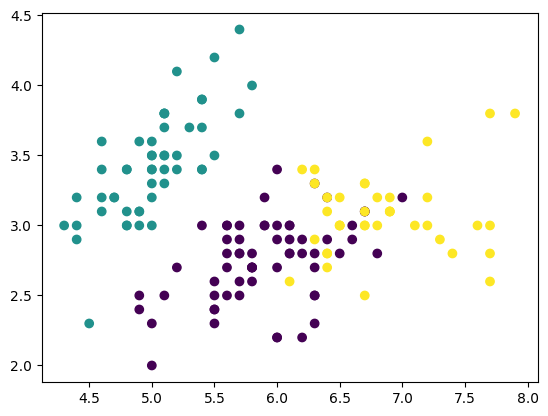

In [7]:
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=labels)
plt.show()

## Метод ліктя

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

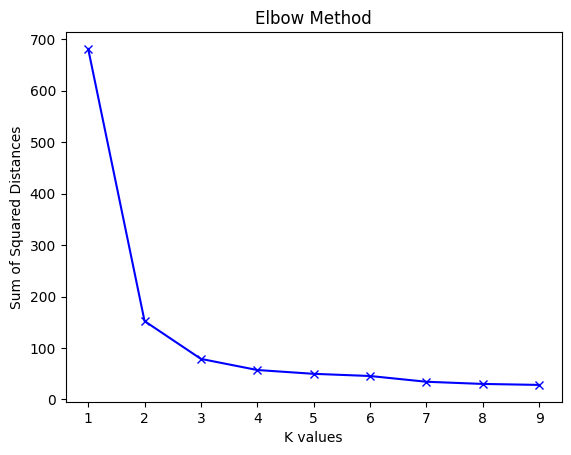

In [8]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Бачимо, що оптимальним значенням можна було б обрати К=3.

## Ієрархічна агломеративна кластеризація

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Одиночне з'єднання (Single linkage)

Одиночне з'єднання - це метод агломеративного ієрархічного кластерного аналізу, де відстань між двома кластерами визначається як найменша відстань між будь-якими двома точками, по одній з кожного кластера.

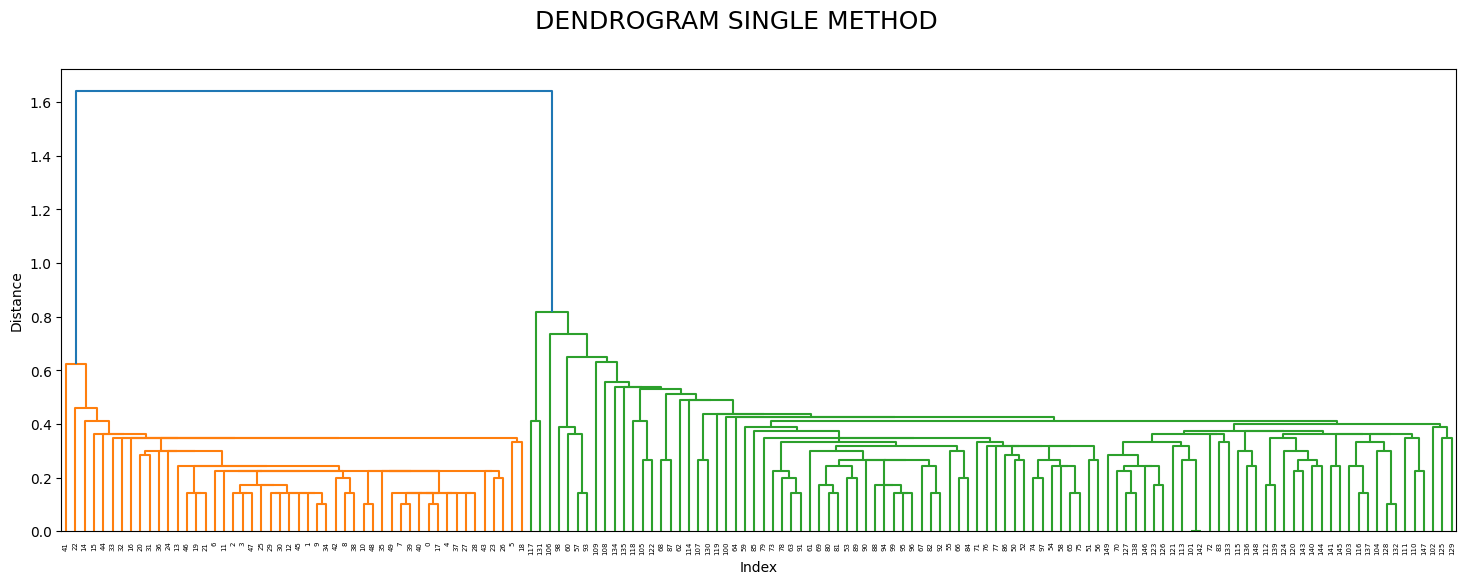

In [10]:
dist_sin = linkage(X, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

Видно, що чітко виділяються два кластери.

Побудуємо кластеризацію на 2 і 3 кластери, а потім порівняємо результати.

Для побудови кластерів нам треба скористатись методом `fcluster`. Цей метод використовується для того, щоб утворити плоскі (неієрархічні) кластери на основі ієрархічного кластеризаційного дерева, яке було створене раніше.

Цей метод допомагає нам з великого дерева кластерів, яке може бути важким для інтерпретації, утворити простіші групи, які ви можете використовувати для аналізу. Ви можете контролювати, скільки таких груп ви отримаєте або наскільки схожі елементи повинні бути, щоб потрапити в одну групу.

### Як це працює:

1. **Вхідні дані:**
   - **Z**: Це матриця, що містить інформацію про ієрархічну кластеризацію (результат функції `linkage`).
   - **t**: Це поріг або максимальна кількість кластерів, що використовується для формування плоских кластерів.
   - **criterion**: Критерій, за яким будуть створюватися плоскі кластери. Є кілька варіантів:
     - **inconsistent**: Об'єднує елементи в один кластер, якщо вони мають подібність, що не перевищує значення порогу.
     - **distance**: Об'єднує елементи, якщо їх відстань не більша за поріг.
     - **maxclust**: Створює рівно ту кількість кластерів, яку ви задаєте як поріг.
     - **monocrit** та **maxclust_monocrit**: Це більш складні критерії, які використовують додаткові статистичні показники для формування кластерів.

2. **Що робить цей метод:**
   - Метод бере ваше ієрархічне дерево кластерів (результат попередньої кластеризації) і, відповідно до вибраного критерію, утворює "плоскі" кластери, тобто групи елементів без подальшої ієрархії.

In [11]:
df['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
df['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,2_clust,3_clust
0,5.1,3.5,1.4,0.2,0,setosa,1,1
1,4.9,3.0,1.4,0.2,0,setosa,1,1
2,4.7,3.2,1.3,0.2,0,setosa,1,1
3,4.6,3.1,1.5,0.2,0,setosa,1,1
4,5.0,3.6,1.4,0.2,0,setosa,1,1


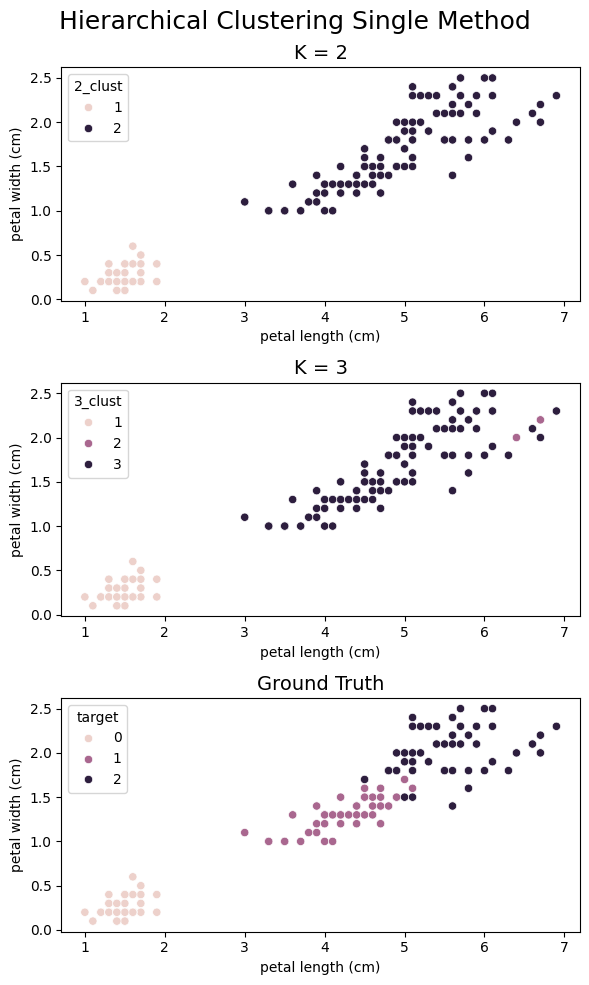

In [13]:
import seaborn as sns

plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="petal length (cm)",y="petal width (cm)", data=df, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="petal length (cm)",y="petal width (cm)", data=df, hue="3_clust")

plt.subplot(3,1,3)
plt.title("Ground Truth",fontsize=14)
sns.scatterplot(x="petal length (cm)",y="petal width (cm)", data=df, hue="target")
plt.tight_layout();

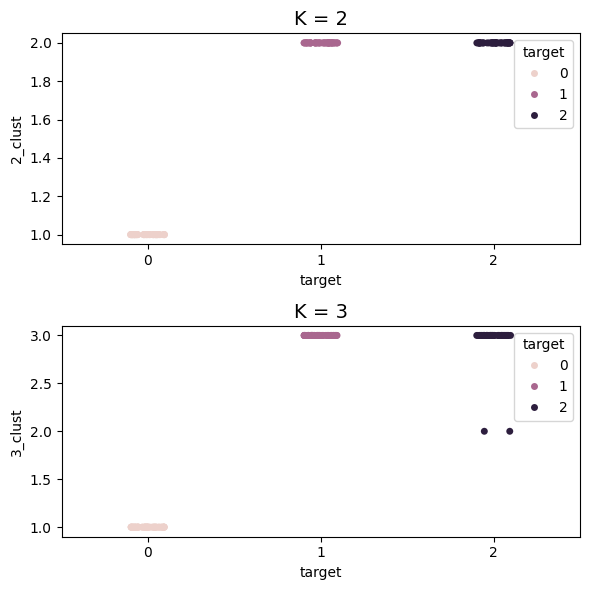

In [14]:
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.title("K = 2",fontsize=14)
sns.stripplot(x="target", y="2_clust", data=df, hue="target")

plt.subplot(2,1,2)
plt.title("K = 3",fontsize=14)
sns.stripplot(x="target", y="3_clust", data=df, hue="target")
plt.tight_layout();

Видимо, перехід від 2 кластерів до 3 не має значення, додатковий кластер не є репрезентативним.

Як і очікувалося, є один вид рослин іриса, чітко класифікований цим методом, однак два інших види не розділяються належним чином при використанні ієрархічної кластеризації з методом «Single» linkage (одиночне з'єднання).

Спробуємо **інтерпретувати** отримані кластери використовуючи середнє значення за кожною колонкою і розбивши дані за кластерами:

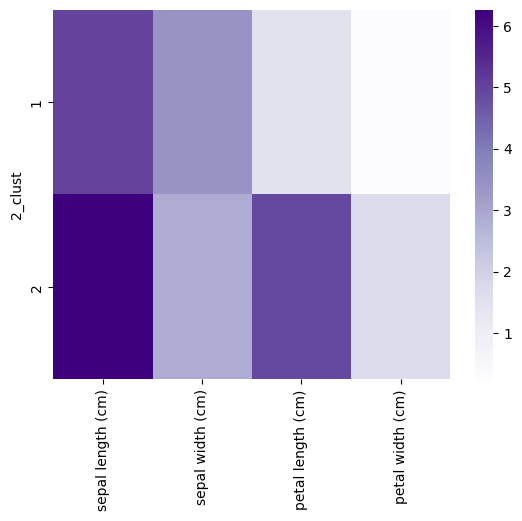

In [15]:
filter_col_names = data.feature_names + ['2_clust']
sns.heatmap(df[filter_col_names].groupby(['2_clust']).mean(), cmap="Purples");

* **Кластер 1:** маленькі лепестки і товсті чашолистки.  
* **Кластер 2:** довгі лепестки і довгі чашолистки.

petal - лепесток, sepal - чашолистик.

Можна інтерпретувати також наступним чином:

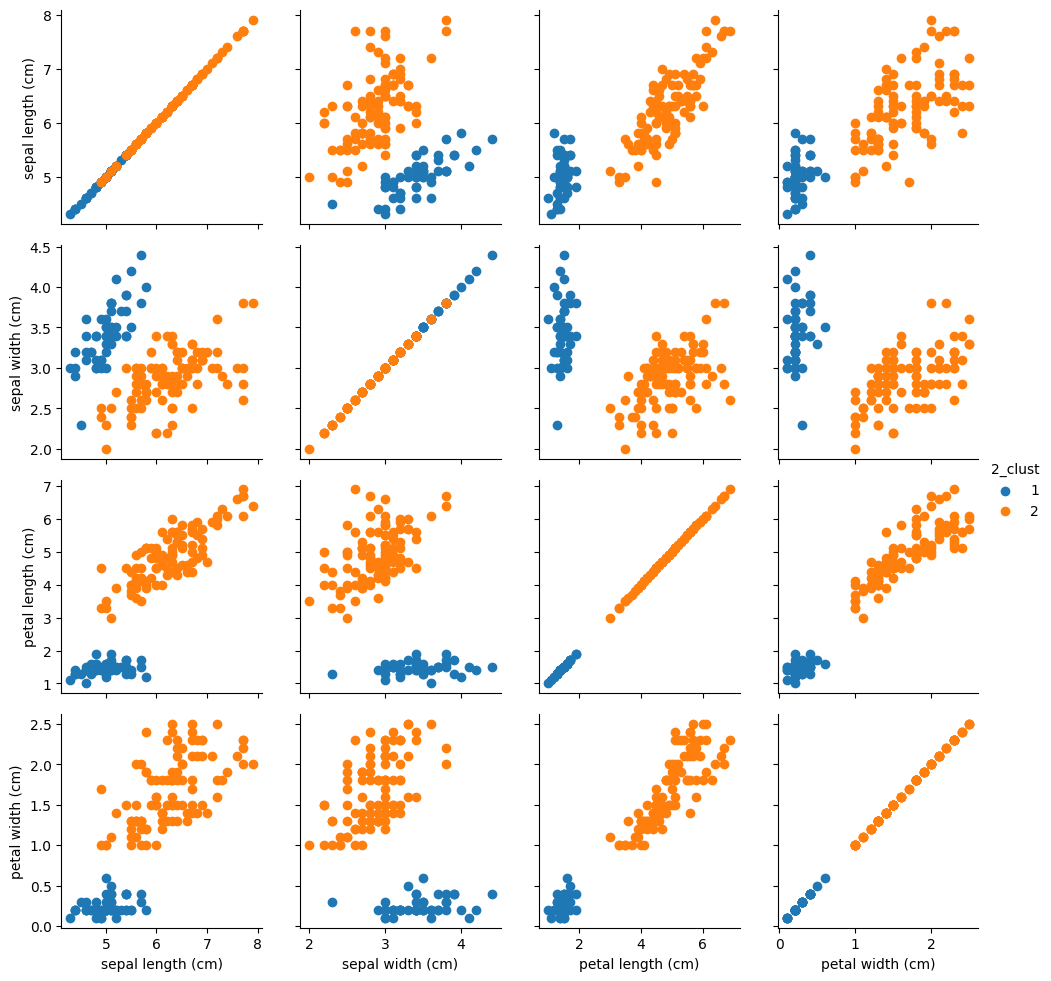

In [16]:
g = sns.PairGrid(
    df,
    vars=data.feature_names,
    hue='2_clust')
g.map(plt.scatter)
g.add_legend();

## Повне з'єднання (Complete linkage)

Це метод агломеративної ієрархічної кластеризації, де відстань між двома кластерами визначається як максимальна відстань між будь-якими двома точками в цих кластерах.

In [ ]:
dist_comp = linkage(X, method="complete")

plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18)
plt.show()

Використання методу «Complete» для ієрархічної кластеризації, схоже, передбачає наявність 2 або 3 кластерів.

Давайте подивимося, наскільки добре ці кластери відтворюють таксономічні види квітів ірису.

In [ ]:
df['2_clust_CM']=fcluster(dist_comp, 2, criterion='maxclust')
df['3_clust_CM']=fcluster(dist_comp, 3, criterion='maxclust')
df.head()

In [ ]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Complete Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="petal length (cm)",y="petal width (cm)", data=df, hue="2_clust_CM")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="petal length (cm)",y="petal width (cm)", data=df, hue="3_clust_CM")

plt.subplot(3,1,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="petal length (cm)",y="petal width (cm)", data=df, hue="target")
plt.tight_layout();

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.title("K = 2",fontsize=14)
sns.stripplot(x="target", y="2_clust_CM", data=df, hue="target")

plt.subplot(2,1,2)
plt.title("K = 3",fontsize=14)
sns.stripplot(x="target", y="3_clust_CM", data=df, hue="target")
plt.tight_layout();

In [ ]:
pd.crosstab(df["target"],df["3_clust_CM"])

У цьому випадку два кластери, здається, не працюють як хороше розділення між трьома видами.

Використання трьох кластерів дозволяє розділити всі екземпляри iris-setosa в один кластер і всі, крім одного екземпляра iris-virginica, в інший.

У цьому випадку використання методу «Complete» для ієрархічної кластеризації дає кращі результати, ніж метод «Single».
Однак дані iris-versicolor все ще проблематичні для алгоритму.

In [ ]:
filter_col_names = data.feature_names + ['3_clust_CM']
sns.heatmap(df[filter_col_names].groupby(['3_clust_CM']).mean(), cmap="Purples");

Теплова карта показує, що розділення кластерів демонструє спадні значення для ширини та довжини пелюстки, а також довжини чашолистка.  
При цьому квіти в групі 3 є меншими, а квіти в групі 1 - більшими.  

* **Кластер 1**: найбільші квіти: у цих квітів найбільші пелюстки та довші чашолистки з набору даних.  
* **Кластер 2**: квіти середнього розміру.  
* **Кластер 3**: маленька квітка.  

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(X)
labels = dbscan.labels_
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


`label == -1` означає, що точка є викидом. Решта значень являють собою номер мітки / кластера, починаючи з 0.

Знайдемо кількість отриманих кластерів.

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [ ]:
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

s = metrics.silhouette_score(X, dbscan.labels_)
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Estimated number of clusters: 2
Estimated number of noise points: 5
Silhouette Coefficient for the data Dataset Clusters: 0.53


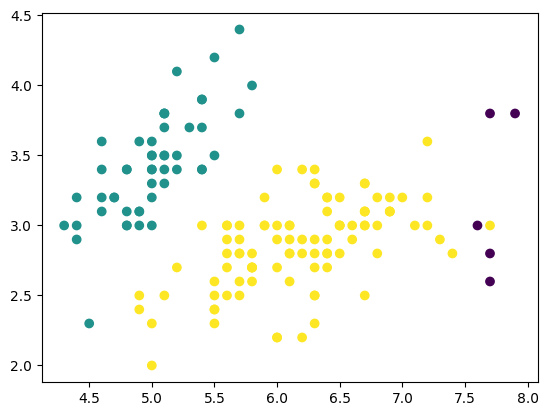

In [ ]:
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=labels)
plt.show()

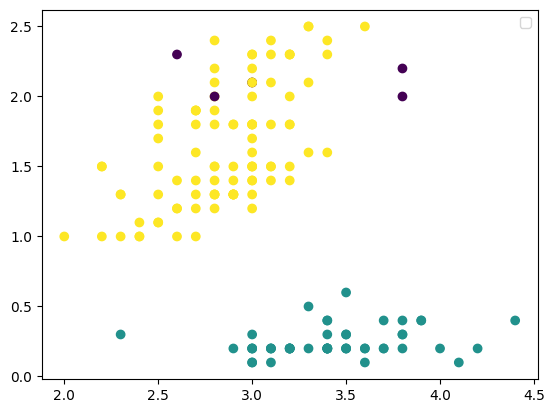

In [ ]:
plt.scatter(X['sepal width (cm)'], X['petal width (cm)'], c=labels)
plt.legend()
plt.show()

# Аналіз метрик силуету та вибір оптимальної кількості кластерів

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

Генеруємо демонстраційні дані за допомогою make_blobs
Цей конкретний параметр має один окремий кластер і 3 кластери, розташовані поруч.

In [ ]:
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

Візуалізуємо згенеровані дані.

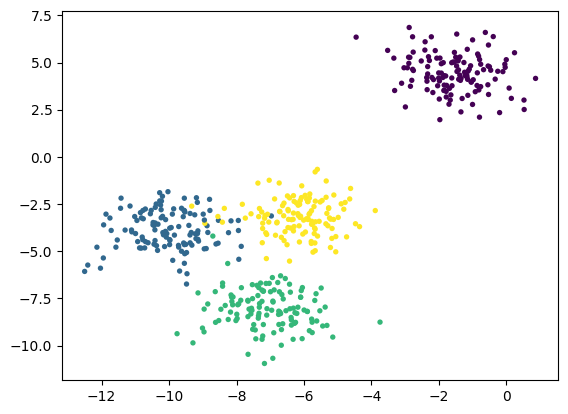

In [ ]:
plt.scatter(
    X[:, 0], X[:, 1], marker=".", s=60, lw=0, c=y, edgecolor="k"
);

Для n_clusters = 2 Середнє значення silhouette_score становить: 0.7049787496083262
Для n_clusters = 3 Середнє значення silhouette_score становить: 0.5882004012129721
Для n_clusters = 4 Середнє значення silhouette_score становить: 0.6505186632729437
Для n_clusters = 5 Середнє значення silhouette_score становить: 0.561464362648773
Для n_clusters = 6 Середнє значення silhouette_score становить: 0.4857596147013469


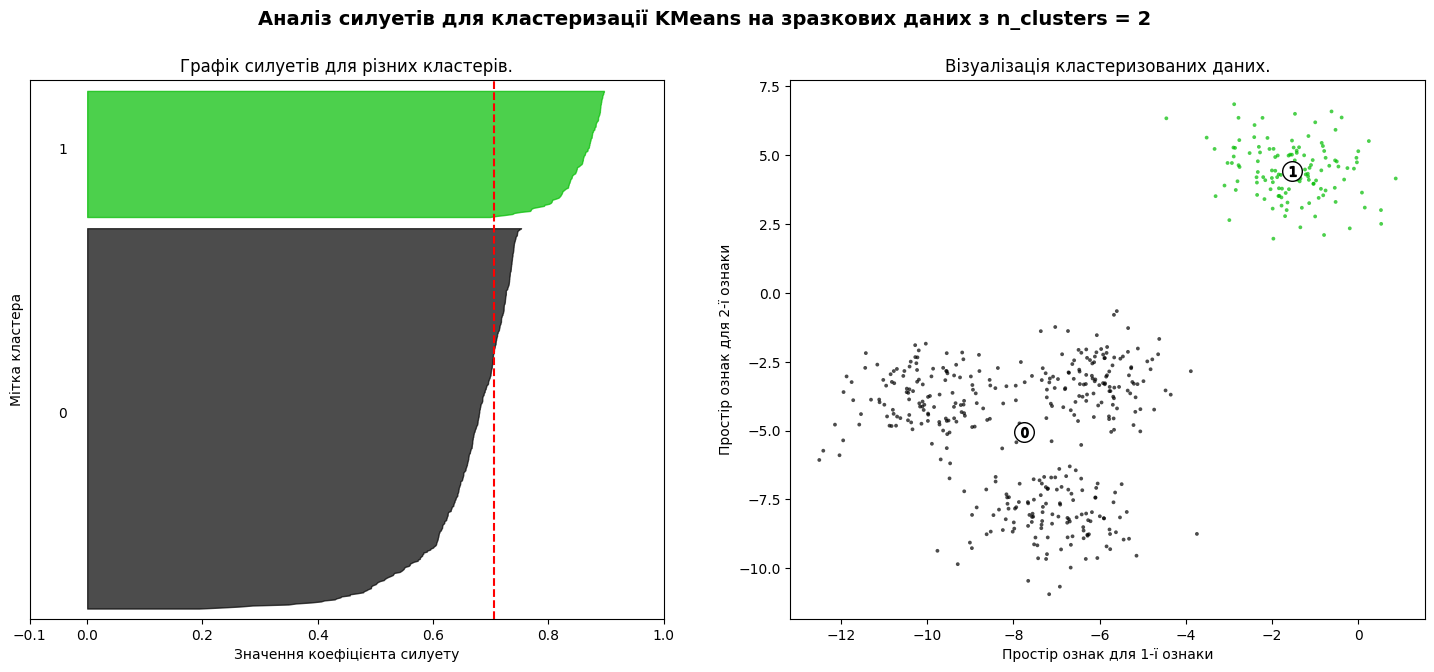

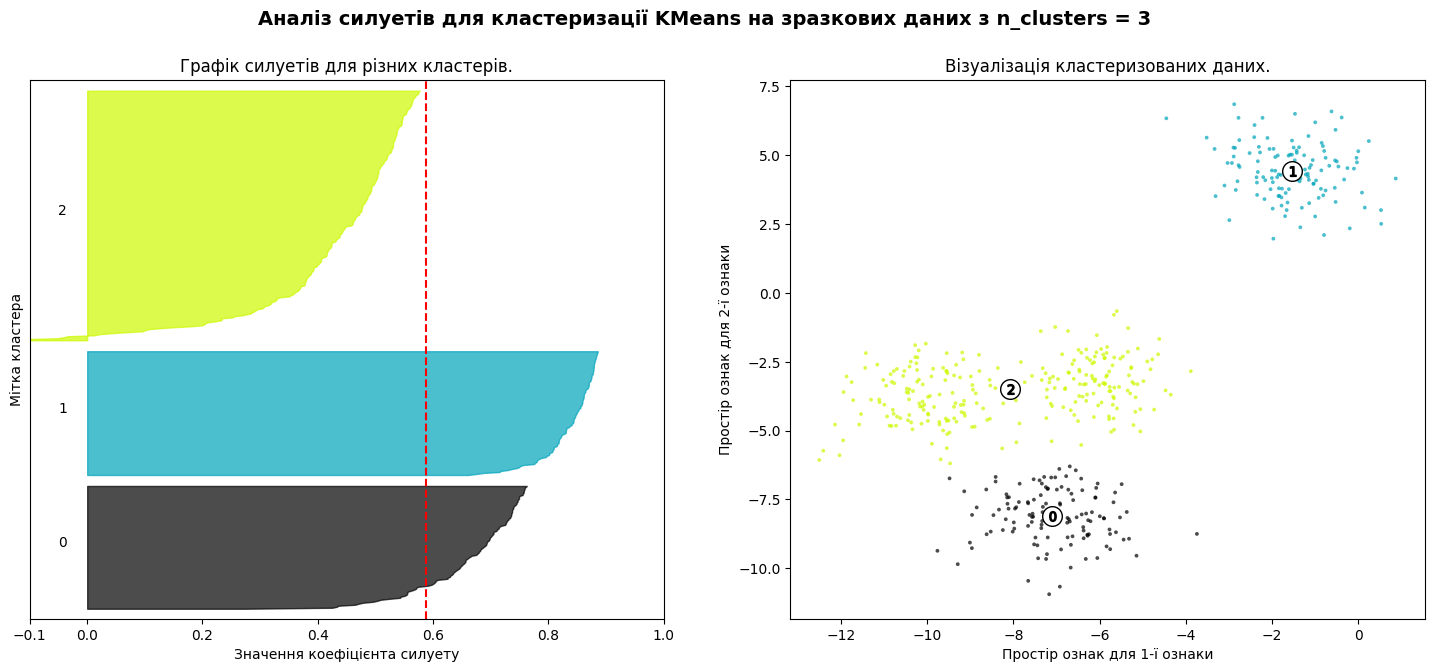

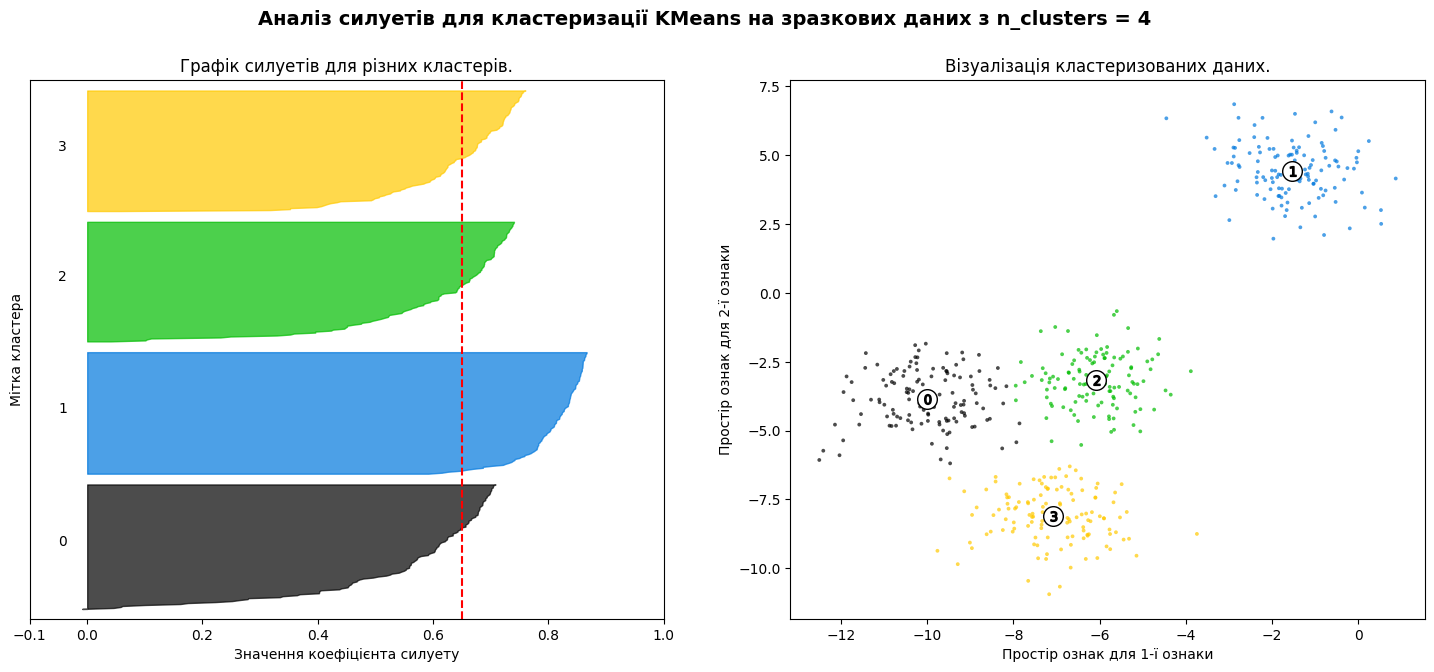

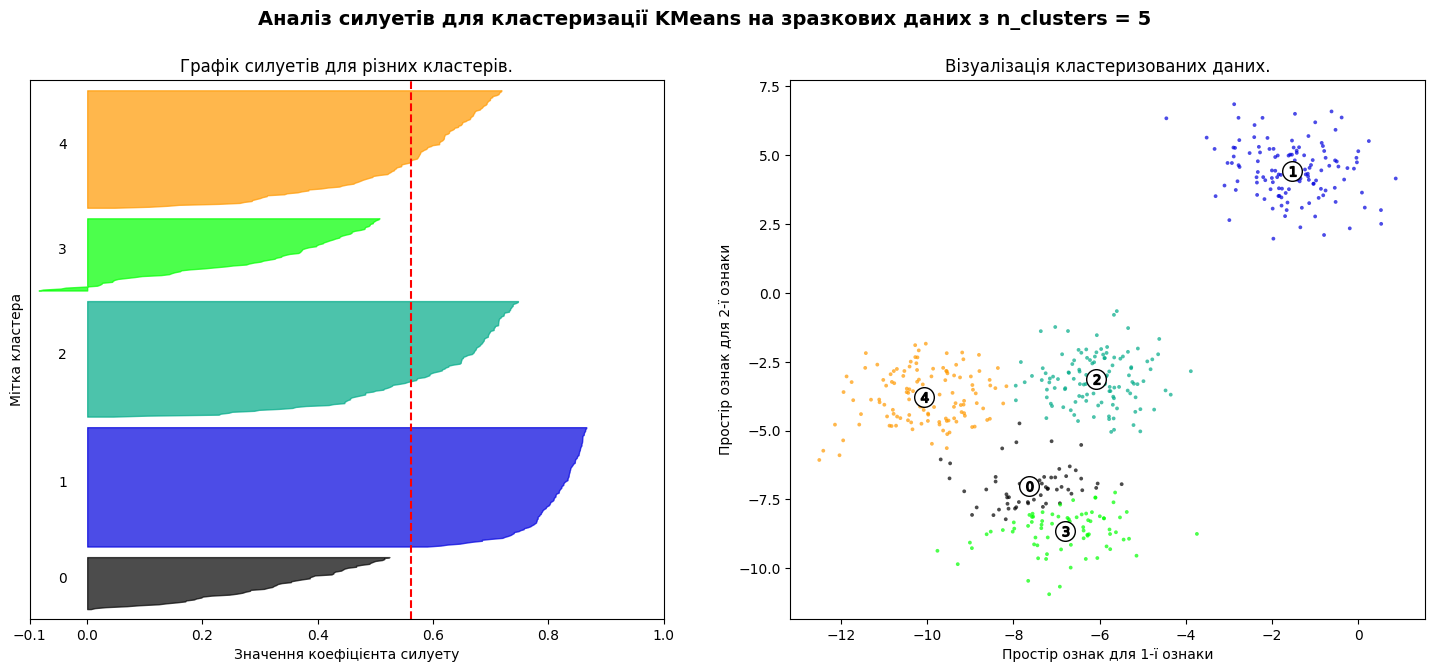

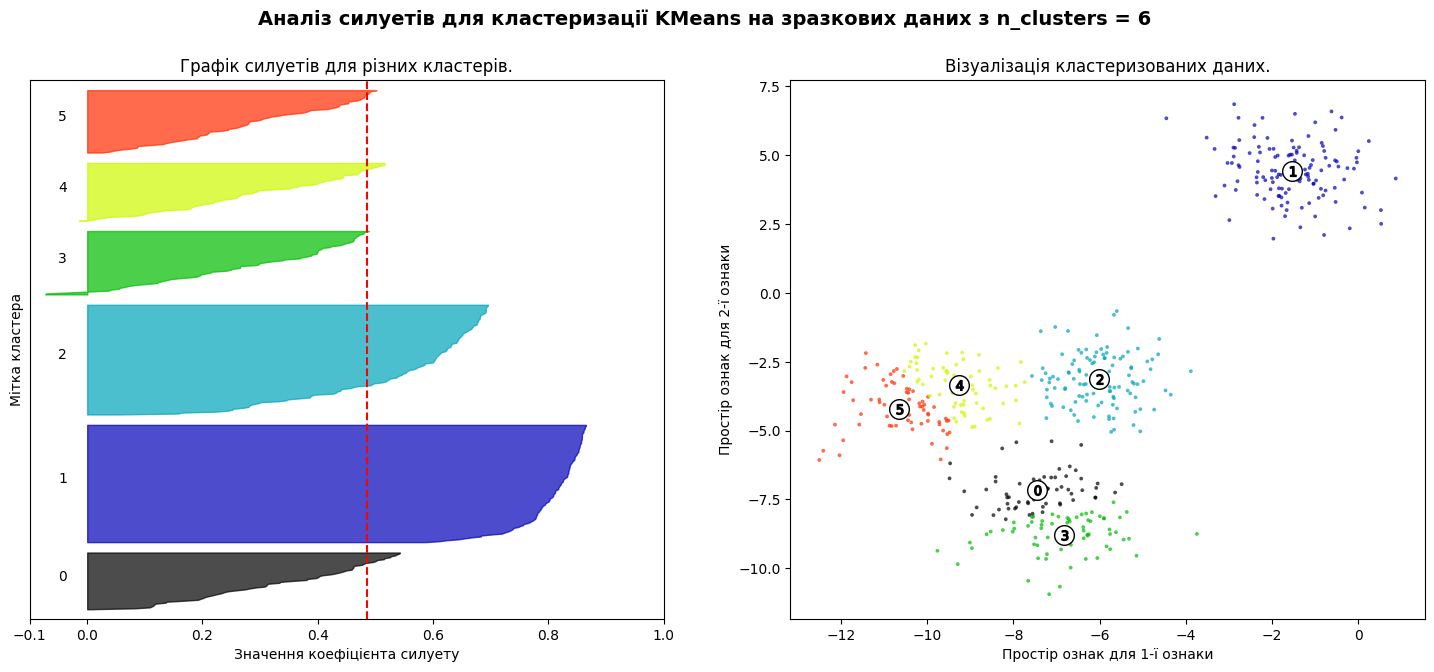

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й підграфік - це графік силуетів. Коефіцієнт силуету може варіюватися від -1 до 1, але в цьому прикладі всі значення лежать в межах [-0.1, 1].
    ax1.set_xlim([-0.1, 1])
    # (N_clusters + 1) * 10 призначено для вставки пустого простору між графіками силуетів окремих кластерів, щоб чітко їх розмежувати.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Ініціюємо кластеризатор
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init='auto')
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Для n_clusters =",
        n_clusters,
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

    # Розраховуємо метрику силуету для кожного екземпляра в наборі даних
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Агрегація оцінок силуетів для зразків, що належать кластеру i, і їх сортування
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Позначимо силуетні області номерами кластерів посередині.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Обчислимо нове значення y_lower для наступного графіка
        y_lower = y_upper + 10

    ax1.set_title("Графік силуетів для різних кластерів.")
    ax1.set_xlabel("Значення коефіцієнта силуету")
    ax1.set_ylabel("Мітка кластера")

    # Вертикальна лінія - середнє значення силуету для всіх значень.
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Прибрати мітки на осі y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й підграфік, що показує фактично сформовані кластери
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Центри кластерів
    centers = clusterer.cluster_centers_
    # Білі кружечки в центрі кластерів
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Візуалізація кластеризованих даних.")
    ax2.set_xlabel("Простір ознак для 1-ї ознаки")
    ax2.set_ylabel("Простір ознак для 2-ї ознаки")

    plt.suptitle(
        "Аналіз силуетів для кластеризації KMeans на зразкових даних з n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

У цьому прикладі аналіз силуету використовується для вибору оптимального значення для n_clusters. Графік силуету показує, що значення n_clusters 3, 5 і 6 - поганий вибір для цих даних через наявність кластерів з оцінками силуету нижче середнього, а також через значні коливання в розмірі графіків силуету.
А ось між 2 і 4 кластерами вибрати складніше.

Також по товщині силуету можна побачити розмір кластера. Графік силуету для кластера 0, коли n_clusters дорівнює 2, більший за розміром через групування 3 субкластерів в один великий кластер. Однак, коли n_clusters дорівнює 4, всі графіки мають більш-менш однакову товщину і, відповідно, мають аналогічні розміри, що також можна перевірити на позначеному графіку розкиду праворуч.